In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Salary_Data.csv')

In [5]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [12]:
data.shape

(30, 2)

In [9]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

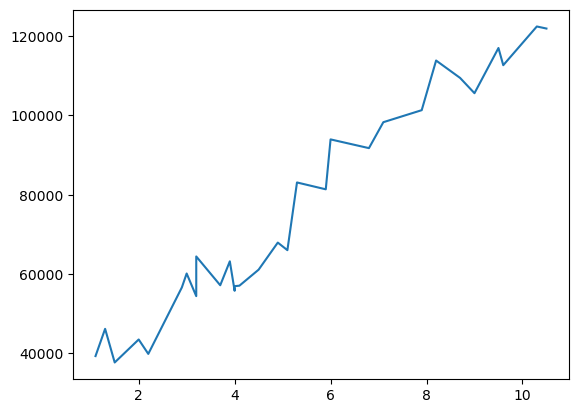

In [15]:
x = data.YearsExperience
y = data.Salary
plt.plot(x,y)

<BarContainer object of 30 artists>

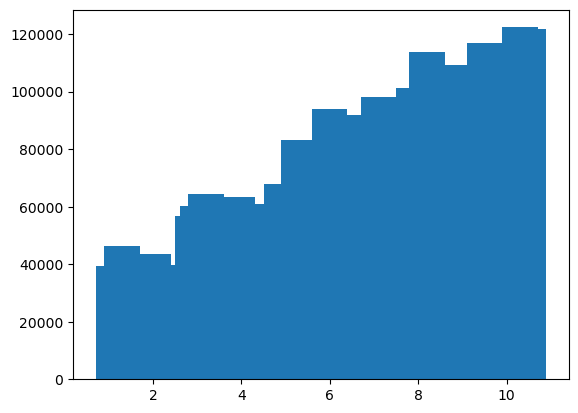

In [16]:
plt.bar(x,y)

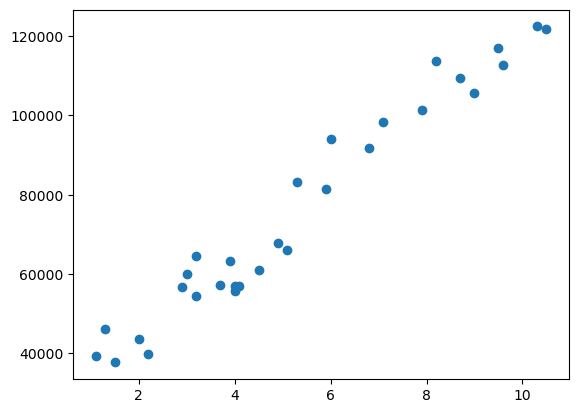

In [17]:
plt.scatter(x,y)

In [18]:
x.shape, y.shape

((30,), (30,))

In [19]:
x,y = x.to_numpy(),y.to_numpy()
x,y = x.reshape(-1,1),y.reshape(-1,1)
x.shape,y.shape

((30, 1), (30, 1))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [22]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.coef_

array([[9320.78266713]])

In [24]:
model.intercept_

array([26586.50836965])

In [25]:
y_pred = model.predict(x_test)
y_pred

array([[72258.34343858],
       [82511.20437242],
       [68530.03037172],
       [47092.23023733],
       [89967.83050612],
       [36839.36930349]])

In [26]:
error = y_pred - y_test
error

array([[  4320.34343858],
       [-11428.79562758],
       [  7419.03037172],
       [  7201.23023733],
       [ -1770.16949388],
       [ -2503.63069651]])

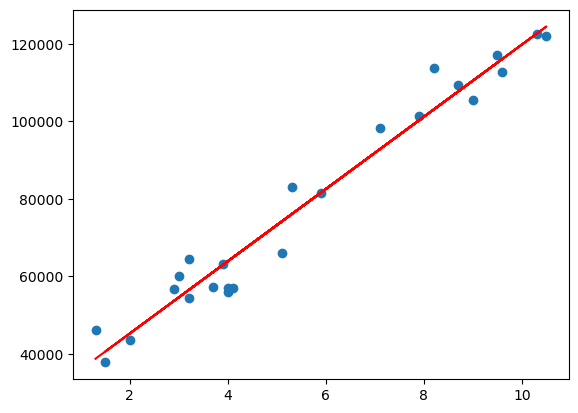

In [27]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')

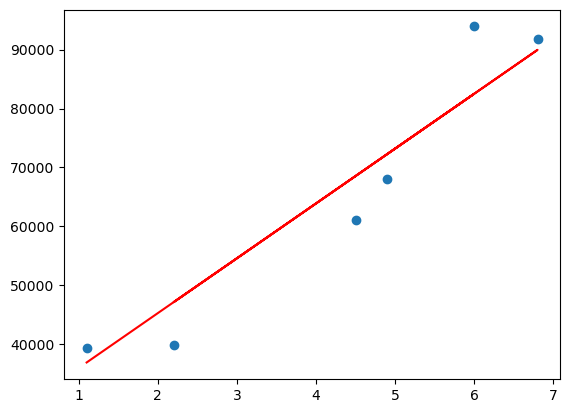

In [28]:
plt.scatter(x_test,y_test)
plt.plot(x_test,model.predict(x_test),color='red')

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse,r2)

6653.121225077636 0.9072139748903774
